# My Top 10 Data Visualization Techniques 

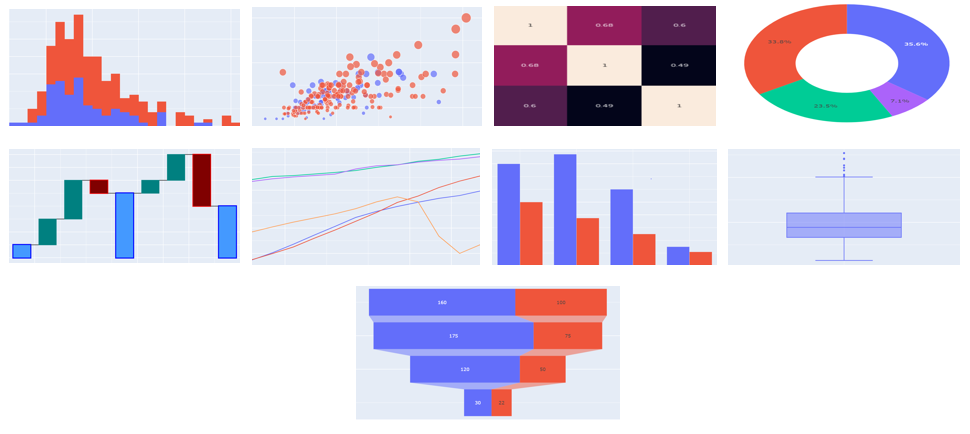

### Why only 9 are above ? 
### Mmm... 10th one is Subplot.

## Table of Contents

1. <a href='#Histogram'>Histogram</a>
2. <a href='#ScatterPlot'>Scatter Plot</a>
3. <a href='#Heatmap'>Heatmap</a>
4. <a href='#Piechart'>Pie chart</a>
5. <a href='#Waterfallchart'>Waterfall chart</a>
6. <a href='#Lineplot'>Line plot</a>
7. <a href='#Barchart'>Bar chart</a>
8. <a href='#Boxplot'>Box plot</a>
9. <a href='#Funnelchart'>Funnel chart</a>
10. <a href='#Subplots'>Subplots</a>

* In the past few years, these are the most used charts in my Data Science lifecycle.
* There are many cases, where some more advanced charts I have used for different analysis.   
But when I recall, by using these 10 types of charts, I have explored most of the structured datasets.
* While working with your own datasets, you can do some customizations over it.

* I also tried to consolidate some of the real-time usecases in my own projects.

### So, let's Start !

### <font color='orange'>Please Upvote</font> if you find this kernel useful.  

## Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Import Dataset

* For most of the charts, I have used the below dataset.
* For few charts, data is considered separately for better representation.

In [ ]:
df = px.data.tips()
print(df.shape)
df.head()

## 1. Histogram <a id='Histogram'></a>

* A histogram is an approximate representation of the distribution of numerical.

In [ ]:
# Histogram

def hist_plot(x_var, filter_var, title):
    '''
    This function plots histogram for multiple variables
    '''
    fig_hist = px.histogram(df, x= x_var, color= filter_var, title= title)
    fig_hist.show()
    
hist_plot("total_bill", "sex", "Total_bill distribution gender wise")

### Use cases

1. Distribution of linear / continuous variables
2. Distribution of variables with custom bins (groups / clusters)

## 2. Scatter plot <a id="ScatterPlot"></a>

* A scatter plot is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data

In [ ]:
# Scatter plot

def scatter_plot(df, x_var, y_var, filter_var, title):
    '''
    This function plots histogram for multiple categories
    '''
    fig_scatter = px.scatter(df, x= x_var, y= y_var, color= filter_var,
                 size=y_var, hover_data=[x_var], title= title)
    fig_scatter.show()
    
scatter_plot(df, "total_bill", "tip", "sex", "Total_bill vs Tip")

### Use cases

1. Relation between 2 variables.   
e.g. If we want to correlate sales of products and #promotions, you may plot these in x and y axis.

## 3. Heatmap <a id="Heatmap"></a>

* A heat map is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions.

In [ ]:
# Heatmap

# Define correlation
corr = df.corr()
corr

# # Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(corr_spearman, dtype=np.bool)) # Uncomment for the upper half of the triangle

# Visualisation of heatmap matrix
def heatmap(df):
    '''
    This function plots a heatmap
    '''
    fig_heatmap, ax = plt.subplots(figsize=(6,6))
#     ax = sns.heatmap(corr_spearman, mask=mask, annot = True) # Uncomment for the upper half of the triangle
    ax = sns.heatmap(df, annot = True)
    ax.set_title('Correlation matrix for numerical variables')
    
heatmap(corr)

### Use cases

1. Correlation matrix between variables.   
e.g. We can plot a derived tables for correlation between different variables with the correlation coefficient in annotation

## 4. Pie chart <a id="Piechart"></a>

* A pie chart is a circular statistical graphic, which is divided into slices to illustrate numerical proportion

In [ ]:
# Pie chart

def pie_chart(df, values, names, title):
    '''
    This function plots a donut chart for a categorical variable
    '''
    fig_pie = px.pie(df, values= values, names= names, title= title, hole=0.5)
    fig_pie.show()
    
pie_chart(df, 'tip', 'day', 'Day-wise Tip %')

* I used a donut chart instaed of pie chart, so that the empty space can be used to display additional data (if present).

### Use cases

1. Comparing or checking parts of a whole.   
e.g. If world's population is 100, we may check which country contributes how much to this.

## 5. Waterfall chart <a id="Waterfallchart"></a>

* A waterfall chart is a form of data visualization that helps in understanding the cumulative effect of sequentially introduced positive or negative values.

In [ ]:
# Waterfall chart

fig = go.Figure(go.Waterfall(
    x = [["2016", "2017", "2017", "2017", "2017", "2018", "2018", "2018", "2018"],
       ["initial", "q1", "q2", "q3", "total", "q1", "q2", "q3", "total"]],
    measure = ["absolute", "relative", "relative", "relative", "total", "relative", "relative", "relative", "total"],
    y = [10, 20, 30, -10, None, 10, 20, -40, None], base = 300,
    decreasing = {"marker":{"color":"Maroon", "line":{"color":"red", "width":2}}},
    increasing = {"marker":{"color":"Teal"}},
    totals = {"marker":{"color":"deep sky blue", "line":{"color":'blue', "width":3}}}
))

fig.update_layout(title = "Profit and Loss statement", waterfallgap = 0.3)

fig.show()

### Use cases

1. Transition of a value over time.   
e.g. If we want to check profit or loss between a year (month-on-month or quarter-on-quarter), we may use the waterfall chart.

## 6. Line plot <a id="Lineplot"></a>

* Line plot is a type of chart which displays information as a series of data points called 'markers' connected by straight line segments

In [ ]:
# Line plot

df_lineplot = px.data.gapminder().query("country==['India', 'Indonesia', 'Zimbabwe', 'United States', 'United Kingdom']")

def line_plot(df, x_var, y_var, filter_var, title):
    '''
    This function plots lines for multiple categories
    '''
    fig_lineplot = px.line(df, x= x_var, y= y_var, color= filter_var, title= title)
    fig_lineplot.show()
    
line_plot(df_lineplot, 'year', 'lifeExp', 'country', 'Country wise Life expectancy over the years')

### Use cases

1. Time series data    
e.g. Want to plot the values of sale over a period of 10 years, then use x-axis as time and y-axis as amount of sale.

## 7. Bar chart <a id="Barchart"></a>

* A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent

In [ ]:
# Bar chart

week_day=['Sat', 'Sun', 'Thu', 'Fri']

fig_bar = go.Figure(data=[
    go.Bar(name='Male', x=week_day, y=[160, 175, 120, 30]),
    go.Bar(name='Female', x=week_day, y=[100, 75, 50, 22])
])
# Change the bar mode
fig_bar.update_layout(barmode='group', title= 'Day-wise Tip by Gender')
fig_bar.show()

### Use cases

1. Categorical values plotting    
e.g. We can plot values for a categorical variable.

## 8. Box plot <a id="Boxplot"></a>

* In descriptive statistics, a box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles.

In [ ]:
# Box plot

def box_plot(df, y_var, title):
    '''
    This function plots box_plot for a numerical variable
    '''
    fig_box = px.box(df, y= y_var, title=title)
    fig_box.show()
    
box_plot(df, 'total_bill', 'Total Bill Distribution')

### Use cases

1. Outlier analysis

## 9. Funnel chart <a id="Funnelchart"></a>

* The Funnel chart is used to visualize the progressive reduction of data as it passes from one phase to another.    
Data in each of these phases is represented as different portions of 100% (the whole).

In [ ]:
# Funnel chart

week_day = ["Sat", "Sun", "Thurs", "Fri"]
df_male = pd.DataFrame(dict(tip=[160, 175, 120, 30], day=week_day))
df_male['sex'] = 'Male'
df_female = pd.DataFrame(dict(tip=[100, 75, 50, 22], day=week_day))
df_female['sex'] = 'Female'
df_funnel = pd.concat([df_male, df_female], axis=0)
fig_funnel = px.funnel(df_funnel, x='tip', y='day', color='sex', title='Day-wise Tip Distribution among gender')
fig_funnel.show()

### Use cases

1. Plot Loan funnel   
e.g. We can plot different stages of a loan application i.e.a) how many loans are applied b) how many are through to the next approval level c) how many have submitted all the documents d) how many are actual granted

## 10. Subplots <a id="Subplots"></a>

* In fiction, a subplot is a secondary strand of the plot that is a supporting side story for any story or the main plot

In [ ]:
# Subplots
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "bar"}, {"type": "barpolar"}],
           [{"type": "pie"}, {"type": "scatter3d"}]],
)

fig.add_trace(go.Bar(y=[2, 3, 1]),
              row=1, col=1)

fig.add_trace(go.Barpolar(theta=[0, 45, 90], r=[2, 3, 1]),
              row=1, col=2)

fig.add_trace(go.Pie(values=[2, 3, 1]),
              row=2, col=1)

fig.add_trace(go.Scatter3d(x=[2, 3, 1], y=[0, 0, 0], 
                           z=[0.5, 1, 2], mode="lines"),
              row=2, col=2)

fig.update_layout(height=600, showlegend=False)

fig.show()

### Use cases

1. Plotting multiple plots at a time

* Hope this would have helped you in some of your practical projects.   
* I will keep adding my day-to-day usecases in a better format.

### Cheers !

See you next time :)

### Thank you for your <font color='red'>Upvote</font> !